In [5]:
import ultralytics
from ultralytics import YOLO
import os
import math
from PIL import Image
import cv2
from IPython.display import Video
import glob
import matplotlib.pyplot as plt
import numpy as np

import board.corners as corners
import board.grid as grid

import warnings
warnings.filterwarnings("ignore")


image 1/1 c:\Users\Gebruiker\Desktop\School\Extended Reality\ChessAR_final\ChessAR\images\warped_image.jpg: 640x640 1 board-8fSi, 34.0ms
Speed: 5.0ms preprocess, 34.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
gets here


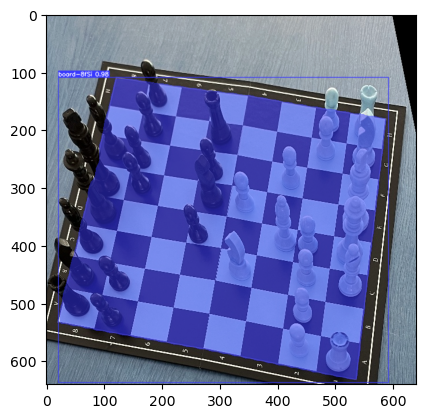

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


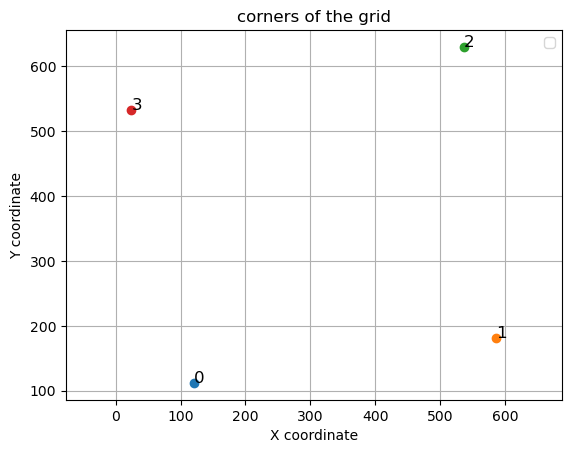

In [6]:
corners_model = YOLO('models/segment_grid.pt')
img_path = 'images/test_images/img_2.jpg'
img_path = 'images/warped_image.jpg'

image = cv2.imread(img_path)

results = grid.predict_grid_segmentation(corners_model, img_path)
corners = grid.get_corners_from_grid_segmentation(results)

test_image = results[0].plot(line_width=1, font_size=12)
plt.imshow(test_image)
plt.show()

for (i,point) in enumerate(corners):
    plt.scatter(point[0], point[1])
    plt.text(point[0], point[1], str(i), fontsize=12)
    
plt.title('corners of the grid')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Equal scaling of x and y axes
plt.show()


In [7]:
warped_image = grid.make_perspective_transform(image, corners)
cv2.imshow('Warped Image', warped_image)
# cv2.imwrite('images/warped_image.jpg', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()